In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib as mpl
import matplotlib.ticker as plticker
import math
from sklearn.model_selection import train_test_split
#classifer is more appropriate for binary outout (RandomForestRegressor gives a range)
#one hot encoding will convert column strings to binaries
#make dummies pandas is a function that will do one hot encoding
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import RadiusNeighborsClassifier

In [2]:
df_dec = pd.read_csv('COVID_Cases_Restricted_Detailed_12042020.csv')
df_dec.head()

,race_ethnicity_combined,current_status,cdc_report_dt,sex,onset_dt,pos_spec_dt,hosp_yn,icu_yn,death_yn,hc_work_yn,...,sob_yn,nauseavomit_yn,headache_yn,abdom_yn,diarrhea_yn,medcond_yn,county_fips_code,res_county,res_state,age_group
0,Unknown,Laboratory-confirmed case,2020-09-15,Female,NaN,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30 - 39 Years
1,Unknown,Laboratory-confirmed case,2020-09-27,Female,NaN,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30 - 39 Years
2,Unknown,Laboratory-confirmed case,2020-09-13,Female,NaN,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30 - 39 Years
3,Unknown,Laboratory-confirmed case,2020-07-31,Female,NaN,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30 - 39 Years
4,Unknown,Laboratory-confirmed case,2020-10-01,Female,NaN,NaN,Missing,Missing,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30 - 39 Years


In [3]:
print(df_dec['death_yn'].value_counts())

No         3690813
Missing    3486923
Unknown    1043766
Yes         183577
Name: death_yn, dtype: int64


In [4]:
death_df = df_dec.loc[(df_dec['death_yn'] == 'Yes') | (df_dec['death_yn'] == 'No')]
death_df.head()

,race_ethnicity_combined,current_status,cdc_report_dt,sex,onset_dt,pos_spec_dt,hosp_yn,icu_yn,death_yn,hc_work_yn,...,sob_yn,nauseavomit_yn,headache_yn,abdom_yn,diarrhea_yn,medcond_yn,county_fips_code,res_county,res_state,age_group
7,NaN,Laboratory-confirmed case,2020-08-17,NaN,2020-07-25,2020-07-27,Yes,Yes,No,NaN,...,Missing,Yes,Yes,Missing,Yes,Yes,72005.0,AGUADILLA,PR,50 - 59 Years
49,Unknown,Laboratory-confirmed case,2020-11-10,Female,NaN,2020-11-01,Missing,Missing,Yes,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,39007.0,ASHTABULA,OH,80+ Years
55,Unknown,Laboratory-confirmed case,2020-05-11,Female,NaN,NaN,No,No,No,Missing,...,Missing,Missing,Missing,Missing,Missing,Yes,39007.0,ASHTABULA,OH,80+ Years
56,Unknown,Laboratory-confirmed case,2020-05-11,Female,NaN,NaN,No,No,No,Missing,...,Missing,Yes,Missing,Missing,Missing,Yes,39007.0,ASHTABULA,OH,80+ Years
58,Unknown,Laboratory-confirmed case,2020-05-11,Female,NaN,NaN,No,No,No,Missing,...,Missing,Missing,Missing,Missing,Missing,Yes,39007.0,ASHTABULA,OH,80+ Years


In [5]:
death_df['death_yn'].value_counts()

No     3690813
Yes     183577
Name: death_yn, dtype: int64

In [6]:
death_df_No_Unknowns = death_df.loc[(df_dec['race_ethnicity_combined'] != 'NaN') & (df_dec['race_ethnicity_combined'] != 'Unknown') & (df_dec['race_ethnicity_combined'] != 'Missing')& (df_dec['race_ethnicity_combined'].notna())]
death_df_No_Unknowns.head()

,race_ethnicity_combined,current_status,cdc_report_dt,sex,onset_dt,pos_spec_dt,hosp_yn,icu_yn,death_yn,hc_work_yn,...,sob_yn,nauseavomit_yn,headache_yn,abdom_yn,diarrhea_yn,medcond_yn,county_fips_code,res_county,res_state,age_group
66,"Black, Non-Hispanic",Laboratory-confirmed case,2020-09-24,Female,NaN,NaN,No,Missing,No,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,16001.0,Ada,ID,20 - 29 Years
67,"Black, Non-Hispanic",Laboratory-confirmed case,2020-06-03,Female,2020-06-02,NaN,No,Missing,No,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,16001.0,Ada,ID,20 - 29 Years
68,"Black, Non-Hispanic",Laboratory-confirmed case,2020-11-08,Female,NaN,NaN,No,Missing,No,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,16001.0,Ada,ID,20 - 29 Years
69,"Black, Non-Hispanic",Laboratory-confirmed case,2020-09-09,Female,2020-09-08,NaN,No,Missing,No,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,16001.0,Ada,ID,20 - 29 Years
70,"Black, Non-Hispanic",Laboratory-confirmed case,2020-07-13,Female,NaN,NaN,No,Missing,No,Missing,...,Missing,Missing,Missing,Missing,Missing,Missing,16001.0,Ada,ID,20 - 29 Years


In [7]:
death_df_No_Unknowns['race_ethnicity_combined'].value_counts()

White, Non-Hispanic                                     1419783
Hispanic/Latino                                          579821
Black, Non-Hispanic                                      383660
Multiple/Other, Non-Hispanic                             134347
Asian, Non-Hispanic                                       74902
American Indian/Alaska Native, Non-Hispanic               14474
Native Hawaiian/Other Pacific Islander, Non-Hispanic       7210
Name: race_ethnicity_combined, dtype: int64

In [8]:
#Load the table with sociodemographic data by county and rename the columns we want to use for better readability
df_health = pd.read_excel('Health Factors by County 2020 County Health Rankings Rows.xls', sheet_name='Ranked Measure Data')
df_health.rename(columns={'Adult obesity - % Adults with Obesity':'% Obesity'
                          , 'Adult smoking - % Smokers':'% Smokers', 
                          'Physical inactivity - % Physically Inactive':'% Phys. Inactive', 
                          'Uninsured - % Uninsured': '% Uninsured', 
                          'High school graduation - High School Graduation Rate':'% High School', 
                          'Some college - % Some College':'% Some College', 
                          'Unemployment - % Unemployed':'% Unemployed'}, inplace=True)
pd.set_option('display.max_columns', None)
df_health.head(3)

,FIPS,State,County,Premature death - Deaths,Premature death - Years of Potential Life Lost Rate,Premature death - 95% CI - Low,Premature death - 95% CI - High,Premature death - Quartile,Premature death - YPLL Rate (AIAN),Premature death - YPLL Rate (AIAN) 95% CI - Low,Premature death - YPLL Rate (AIAN) 95% CI - High,Premature death - YPLL Rate (Asian),Premature death - YPLL Rate (Asian) 95% CI - Low,Premature death - YPLL Rate (Asian) 95% CI - High,Premature death - YPLL Rate (Black),Premature death - YPLL Rate (Black) 95% CI - Low,Premature death - YPLL Rate (Black) 95% CI - High,Premature death - YPLL Rate (Hispanic),Premature death - YPLL Rate (Hispanic) 95% CI - Low,Premature death - YPLL Rate (Hispanic) 95% CI - High,Premature death - YPLL Rate (White),Premature death - YPLL Rate (White) 95% CI - Low,Premature death - YPLL Rate (White) 95% CI - High,Poor or fair health - % Fair or Poor Health,Poor or fair health - 95% CI - Low,Poor or fair health - 95% CI - High,Poor or fair health - Quartile,Poor physical health days - Average Number of Physically Unhealthy Days,Poor physical health days - 95% CI - Low,Poor physical health days - 95% CI - High,Poor physical health days - Quartile,Poor mental health days - Average Number of Mentally Unhealthy Days,Poor mental health days - 95% CI - Low,Poor mental health days - 95% CI - High,Poor mental health days - Quartile,Low birthweight - Unreliable,Low birthweight - % Low Birthweight,Low birthweight - 95% CI - Low,Low birthweight - 95% CI - High,Low birthweight - Quartile,Low birthweight - % LBW (AIAN),Low birthweight - % LBW (AIAN) 95% CI - Low,Low birthweight - % LBW (AIAN) 95% CI - High,Low birthweight - % LBW (Asian),Low birthweight - % LBW (Asian) 95% CI - Low,Low birthweight - % LBW (Asian) 95% CI - High,Low birthweight - % LBW (Black),Low birthweight - % LBW (Black) 95% CI - Low,Low birthweight - % LBW (Black) 95% CI - High,Low birthweight - % LBW (Hispanic),Low birthweight - % LBW (Hispanic) 95% CI - Low,Low birthweight - % LBW (Hispanic) 95% CI - High,Low birthweight - % LBW (White),Low birthweight - % LBW (White) 95% CI - Low,Low birthweight - % LBW (White) 95% CI - High,% Smokers,Adult smoking - 95% CI - Low,Adult smoking - 95% CI - High,Adult smoking - Quartile,% Obesity,Adult obesity - 95% CI - Low,Adult obesity - 95% CI - High,Adult obesity - Quartile,Food environment index - Food Environment Index,Food environment index - Quartile,% Phys. Inactive,Physical inactivity - 95% CI - Low,Physical inactivity - 95% CI - High,Physical inactivity - Quartile,Access to exercise opportunities - % With Access to Exercise Opportunities,Access to exercise opportunities - Quartile,Excessive drinking - % Excessive Drinking,Excessive drinking - 95% CI - Low,Excessive drinking - 95% CI - High,Excessive drinking - Quartile,Alcohol-impaired driving deaths - # Alcohol-Impaired Driving Deaths,Alcohol-impaired driving deaths - # Driving Deaths,Alcohol-impaired driving deaths - % Driving Deaths with Alcohol Involvement,Alcohol-impaired driving deaths - 95% CI - Low,Alcohol-impaired driving deaths - 95% CI - High,Alcohol-impaired driving deaths - Quartile,Sexually transmitted infections - # Chlamydia Cases,Sexually transmitted infections - Chlamydia Rate,Sexually transmitted infections - Quartile,Teen births - Teen Birth Rate,Teen births - 95% CI - Low,Teen births - 95% CI - High,Teen births - Quartile,Teen births - Teen Birth Rate (AIAN),Teen births - Teen Birth Rate (AIAN) 95% CI - Low,Teen births - Teen Birth Rate (AIAN) 95% CI - High,Teen births - Teen Birth Rate (Asian),Teen births - Teen Birth Rate (Asian) 95% CI - Low,Teen births - Teen Birth Rate (Asian) 95% CI - High,Teen births - Teen Birth Rate (Black),Teen births - Teen Birth Rate (Black) 95% CI - Low,Teen births - Teen Birth Rate (Black) 95% CI - High,Teen births - Teen Birth Rate (Hispanic),Teen births - Teen Birth Rate (Hispanic) 95% CI - Low,Teen births - Teen Birth Rate (Hispanic) 95% CI - High,Teen births - Teen Birth Rate (Wh

In [9]:
#Bucket the selected columns into 10 bins each
df_health.insert(0,"% Smokers bin","")
df_health["% Smokers bin"] = pd.cut(df_health['% Smokers'], 10)
df_health.insert(0,"% Obesity bin","")
df_health["% Obesity bin"] = pd.cut(df_health['% Obesity'], 10)
df_health.insert(0,"% Phys. Inactive bin","")
df_health["% Phys. Inactive bin"] = pd.cut(df_health['% Phys. Inactive'], 10)
df_health.insert(0,"% Uninsured bin","")
df_health["% Uninsured bin"] = pd.cut(df_health['% Uninsured'], 10)
df_health.insert(0,"% High School bin","")
df_health["% High School bin"] = pd.cut(df_health['% High School'], 10)
df_health.insert(0,"% Some College bin","")
df_health["% Some College bin"] = pd.cut(df_health['% Some College'], 10)
df_health.insert(0,"% Unemployed bin","")
df_health["% Unemployed bin"] = pd.cut(df_health['% Unemployed'], 10)
df_health.head(3)

,% Unemployed bin,% Some College bin,% High School bin,% Uninsured bin,% Phys. Inactive bin,% Obesity bin,% Smokers bin,FIPS,State,County,Premature death - Deaths,Premature death - Years of Potential Life Lost Rate,Premature death - 95% CI - Low,Premature death - 95% CI - High,Premature death - Quartile,Premature death - YPLL Rate (AIAN),Premature death - YPLL Rate (AIAN) 95% CI - Low,Premature death - YPLL Rate (AIAN) 95% CI - High,Premature death - YPLL Rate (Asian),Premature death - YPLL Rate (Asian) 95% CI - Low,Premature death - YPLL Rate (Asian) 95% CI - High,Premature death - YPLL Rate (Black),Premature death - YPLL Rate (Black) 95% CI - Low,Premature death - YPLL Rate (Black) 95% CI - High,Premature death - YPLL Rate (Hispanic),Premature death - YPLL Rate (Hispanic) 95% CI - Low,Premature death - YPLL Rate (Hispanic) 95% CI - High,Premature death - YPLL Rate (White),Premature death - YPLL Rate (White) 95% CI - Low,Premature death - YPLL Rate (White) 95% CI - High,Poor or fair health - % Fair or Poor Health,Poor or fair health - 95% CI - Low,Poor or fair health - 95% CI - High,Poor or fair health - Quartile,Poor physical health days - Average Number of Physically Unhealthy Days,Poor physical health days - 95% CI - Low,Poor physical health days - 95% CI - High,Poor physical health days - Quartile,Poor mental health days - Average Number of Mentally Unhealthy Days,Poor mental health days - 95% CI - Low,Poor mental health days - 95% CI - High,Poor mental health days - Quartile,Low birthweight - Unreliable,Low birthweight - % Low Birthweight,Low birthweight - 95% CI - Low,Low birthweight - 95% CI - High,Low birthweight - Quartile,Low birthweight - % LBW (AIAN),Low birthweight - % LBW (AIAN) 95% CI - Low,Low birthweight - % LBW (AIAN) 95% CI - High,Low birthweight - % LBW (Asian),Low birthweight - % LBW (Asian) 95% CI - Low,Low birthweight - % LBW (Asian) 95% CI - High,Low birthweight - % LBW (Black),Low birthweight - % LBW (Black) 95% CI - Low,Low birthweight - % LBW (Black) 95% CI - High,Low birthweight - % LBW (Hispanic),Low birthweight - % LBW (Hispanic) 95% CI - Low,Low birthweight - % LBW (Hispanic) 95% CI - High,Low birthweight - % LBW (White),Low birthweight - % LBW (White) 95% CI - Low,Low birthweight - % LBW (White) 95% CI - High,% Smokers,Adult smoking - 95% CI - Low,Adult smoking - 95% CI - High,Adult smoking - Quartile,% Obesity,Adult obesity - 95% CI - Low,Adult obesity - 95% CI - High,Adult obesity - Quartile,Food environment index - Food Environment Index,Food environment index - Quartile,% Phys. Inactive,Physical inactivity - 95% CI - Low,Physical inactivity - 95% CI - High,Physical inactivity - Quartile,Access to exercise opportunities - % With Access to Exercise Opportunities,Access to exercise opportunities - Quartile,Excessive drinking - % Excessive Drinking,Excessive drinking - 95% CI - Low,Excessive drinking - 95% CI - High,Excessive drinking - Quartile,Alcohol-impaired driving deaths - # Alcohol-Impaired Driving Deaths,Alcohol-impaired driving deaths - # Driving Deaths,Alcohol-impaired driving deaths - % Driving Deaths with Alcohol Involvement,Alcohol-impaired driving deaths - 95% CI - Low,Alcohol-impaired driving deaths - 95% CI - High,Alcohol-impaired driving deaths - Quartile,Sexually transmitted infections - # Chlamydia Cases,Sexually transmitted infections - Chlamydia Rate,Sexually transmitted infections - Quartile,Teen births - Teen Birth Rate,Teen births - 95% CI - Low,Teen births - 95% CI - High,Teen births - Quartile,Teen births - Teen Birth Rate (AIAN),Teen births - Teen Birth Rate (AIAN) 95% CI - Low,Teen births - Teen Birth Rate (AIAN) 95% CI - High,Teen births - Teen Birth Rate (Asian),Teen births - Teen Birth Rate (Asian) 95% CI - Low,Teen births - Teen Birth Rate (Asian) 95% CI - High,Teen births - Teen Birth Rate (Black),Teen births - Teen Birth Rate (Black) 95% CI - Low,Teen births - Teen Birth Rate (Black) 95% CI - High,Teen births - Teen Birth Rate (Hispanic),Teen births - Teen Birt

In [10]:
#Replace name of county_fips_code with "FIPS" so that we can merge on the column
death_df.rename(columns={"county_fips_code": "FIPS"}, inplace=True)
death_df_No_Unknowns.rename(columns={"county_fips_code": "FIPS"}, inplace=True)
death_df.head(3)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,race_ethnicity_combined,current_status,cdc_report_dt,sex,onset_dt,pos_spec_dt,hosp_yn,icu_yn,death_yn,hc_work_yn,pna_yn,abxchest_yn,acuterespdistress_yn,mechvent_yn,fever_yn,sfever_yn,chills_yn,myalgia_yn,runnose_yn,sthroat_yn,cough_yn,sob_yn,nauseavomit_yn,headache_yn,abdom_yn,diarrhea_yn,medcond_yn,FIPS,res_county,res_state,age_group
7,NaN,Laboratory-confirmed case,2020-08-17,NaN,2020-07-25,2020-07-27,Yes,Yes,No,NaN,Yes,Yes,Yes,No,Yes,Missing,Missing,Yes,Missing,Missing,Yes,Missing,Yes,Yes,Missing,Yes,Yes,72005.0,AGUADILLA,PR,50 - 59 Years
49,Unknown,Laboratory-confirmed case,2020-11-10,Female,NaN,2020-11-01,Missing,Missing,Yes,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,39007.0,ASHTABULA,OH,80+ Years
55,Unknown,Laboratory-confirmed case,2020-05-11,Female,NaN,NaN,No,No,No,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Yes,39007.0,ASHTABULA,OH,80+ Years


In [11]:
#Add the county level columns on to the CDC data set based on the FIPS
death_df = pd.merge(death_df, df_health[['FIPS','% Obesity bin','% Smokers bin','% Phys. Inactive bin','% Uninsured bin','% High School bin','% Some College bin','% Unemployed bin']], on='FIPS', how='left')
death_df_No_Unknowns = pd.merge(death_df_No_Unknowns, df_health[['FIPS','% Obesity bin','% Smokers bin','% Phys. Inactive bin','% Uninsured bin','% High School bin','% Some College bin','% Unemployed bin']], on='FIPS', how='left')

In [12]:
death_df.head(10)

,race_ethnicity_combined,current_status,cdc_report_dt,sex,onset_dt,pos_spec_dt,hosp_yn,icu_yn,death_yn,hc_work_yn,pna_yn,abxchest_yn,acuterespdistress_yn,mechvent_yn,fever_yn,sfever_yn,chills_yn,myalgia_yn,runnose_yn,sthroat_yn,cough_yn,sob_yn,nauseavomit_yn,headache_yn,abdom_yn,diarrhea_yn,medcond_yn,FIPS,res_county,res_state,age_group,% Obesity bin,% Smokers bin,% Phys. Inactive bin,% Uninsured bin,% High School bin,% Some College bin,% Unemployed bin
0,NaN,Laboratory-confirmed case,2020-08-17,NaN,2020-07-25,2020-07-27,Yes,Yes,No,NaN,Yes,Yes,Yes,No,Yes,Missing,Missing,Yes,Missing,Missing,Yes,Missing,Yes,Yes,Missing,Yes,Yes,72005.0,AGUADILLA,PR,50 - 59 Years,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Unknown,Laboratory-confirmed case,2020-11-10,Female,NaN,2020-11-01,Missing,Missing,Yes,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,39007.0,ASHTABULA,OH,80+ Years,"(35.05, 39.58]","(20.142, 23.7]","(29.7, 33.74]","(5.411, 8.56]","(85.128, 92.564]","(40.623, 49.106]","(5.022, 6.883]"
2,Unknown,Laboratory-confirmed case,2020-05-11,Female,NaN,NaN,No,No,No,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Yes,39007.0,ASHTABULA,OH,80+ Years,"(35.05, 39.58]","(20.142, 23.7]","(29.7, 33.74]","(5.411, 8.56]","(85.128, 92.564]","(40.623, 49.106]","(5.022, 6.883]"
3,Unknown,Laboratory-confirmed case,2020-05-11,Female,NaN,NaN,No,No,No,Missing,No,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Yes,Missing,Missing,Missing,Yes,39007.0,ASHTABULA,OH,80+ Years,"(35.05, 39.58]","(20.142, 23.7]","(29.7, 33.74]","(5.411, 8.56]","(85.128, 92.564]","(40.623, 49.106]","(5.022, 6.883]"
4,Unknown,Laboratory-confirmed case,2020-05-11,Female,NaN,NaN,No,No,No,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Yes,39007.0,ASHTABULA,OH,80+ Years,"(35.05, 39.58]","(20.142, 23.7]","(29.7, 33.74]","(5.411, 8.56]","(85.128, 92.564]","(40.623, 49.106]","(5.022, 6.883]"
5,Unknown,Laboratory-confirmed case,2020-04-27,Female,NaN,NaN,No,Missing,No,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Yes,39007.0,ASHTABULA,OH,80+ Years,"(35.05, 39.58]","(20.142, 23.7]","(29.7, 33.74]","(5.411, 8.56]","(85.128, 92.564]","(40.623, 49.106]","(5.022, 6.883]"
6,NaN,Laboratory-confirmed case,2020-10-04,Female,2020-10-01,NaN,No,Missing,No,NaN,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,45001.0,Abbeville,SC,60 - 69 Years,"(35.05, 39.58]","(16.583, 20.142]","(25.66, 29.7]","(11.709, 14.857]","(85.128, 92.564]","(49.106, 57.588]","(3.162, 5.022]"
7,NaN,Laboratory-confirmed case,2020-10-31,Female,2020-10-27,NaN,No,Missing,No,NaN,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,45001.0,Abbeville,SC,60 - 69 Years,"(35.05, 39.58]","(16.583, 20.142]","(25.66, 29.7]","(11.709, 14.857]","(85.128, 92.564]","(49.106, 57.588]","(3.162, 5.022]"
8,"Black, Non-Hispanic",Laboratory-confirmed case,2020-09-24,Female,NaN,NaN,No,Missing,No,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,16001.0,Ada,ID,20 - 29 Years,"(21.46, 25.99]","(9.467, 13.025]","(13.54, 17.58]","(8.56, 11.709]","(77.692, 85.128]","(66.07, 74.553]","(1.283, 3.162]"
9,"Black, Non-Hispanic",Laboratory-confirmed case,2020-06-03,Female,2020-06-02,NaN,No,Missing,No,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,16001.0,Ada,ID,20 - 29 Years,"(21.46, 25.99]","(9.467, 13.025]","(13.54, 17.58]","(8

In [13]:
#one hot encoding
death_sex_dummy = pd.get_dummies(death_df[['death_yn','race_ethnicity_combined','age_group','sex','hosp_yn','icu_yn','hc_work_yn','pna_yn','abxchest_yn','acuterespdistress_yn','mechvent_yn','fever_yn','sfever_yn','chills_yn','myalgia_yn','runnose_yn','sthroat_yn','cough_yn','sob_yn','nauseavomit_yn','headache_yn','abdom_yn','diarrhea_yn','medcond_yn','% Obesity bin','% Smokers bin','% Phys. Inactive bin','% Uninsured bin','% High School bin','% Some College bin','% Unemployed bin']],dummy_na=True)

with pd.option_context('display.max_rows', 20, 'display.max_columns', None): 
    print(death_sex_dummy.head())

   death_yn_No  death_yn_Yes  death_yn_nan  \
0            1             0             0   
1            0             1             0   
2            1             0             0   
3            1             0             0   
4            1             0             0   

   race_ethnicity_combined_American Indian/Alaska Native, Non-Hispanic  \
0                                                  0                     
1                                                  0                     
2                                                  0                     
3                                                  0                     
4                                                  0                     

   race_ethnicity_combined_Asian, Non-Hispanic  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                           

In [14]:
#one hot encoding
death_sex_dummy_no_unknowns = pd.get_dummies(death_df_No_Unknowns[['death_yn','race_ethnicity_combined','age_group','sex','hosp_yn','icu_yn','hc_work_yn','pna_yn','abxchest_yn','acuterespdistress_yn','mechvent_yn','fever_yn','sfever_yn','chills_yn','myalgia_yn','runnose_yn','sthroat_yn','cough_yn','sob_yn','nauseavomit_yn','headache_yn','abdom_yn','diarrhea_yn','medcond_yn','% Obesity bin','% Smokers bin','% Phys. Inactive bin','% Uninsured bin','% High School bin','% Some College bin','% Unemployed bin']],dummy_na=True)


In [15]:
deaths_array = death_sex_dummy['death_yn_Yes']
other_data = death_sex_dummy.iloc[:,3:]

In [16]:
deaths_array_no_unknowns = death_sex_dummy_no_unknowns['death_yn_Yes']
other_data_no_unknowns = death_sex_dummy_no_unknowns.iloc[:,3:]

In [17]:
other_data_no_unknowns.head()

,"race_ethnicity_combined_American Indian/Alaska Native, Non-Hispanic","race_ethnicity_combined_Asian, Non-Hispanic","race_ethnicity_combined_Black, Non-Hispanic",race_ethnicity_combined_Hispanic/Latino,"race_ethnicity_combined_Multiple/Other, Non-Hispanic","race_ethnicity_combined_Native Hawaiian/Other Pacific Islander, Non-Hispanic","race_ethnicity_combined_White, Non-Hispanic",race_ethnicity_combined_nan,age_group_0 - 9 Years,age_group_10 - 19 Years,age_group_20 - 29 Years,age_group_30 - 39 Years,age_group_40 - 49 Years,age_group_50 - 59 Years,age_group_60 - 69 Years,age_group_70 - 79 Years,age_group_80+ Years,age_group_Unknown,age_group_nan,sex_Female,sex_Male,sex_Missing,sex_Unknown,sex_nan,hosp_yn_Missing,hosp_yn_No,hosp_yn_Unknown,hosp_yn_Yes,hosp_yn_nan,icu_yn_Missing,icu_yn_No,icu_yn_Unknown,icu_yn_Yes,icu_yn_nan,hc_work_yn_Missing,hc_work_yn_No,hc_work_yn_Unknown,hc_work_yn_Yes,hc_work_yn_nan,pna_yn_Missing,pna_yn_No,pna_yn_Unknown,pna_yn_Yes,pna_yn_nan,abxchest_yn_Missing,abxchest_yn_No,abxchest_yn_Unknown,abxchest_yn_Yes,abxchest_yn_nan,acuterespdistress_yn_Missing,acuterespdistress_yn_No,acuterespdistress_yn_Unknown,acuterespdistress_yn_Yes,acuterespdistress_yn_nan,mechvent_yn_Missing,mechvent_yn_No,mechvent_yn_Unknown,mechvent_yn_Yes,mechvent_yn_nan,fever_yn_Missing,fever_yn_No,fever_yn_Unknown,fever_yn_Yes,fever_yn_nan,sfever_yn_Missing,sfever_yn_No,sfever_yn_Unknown,sfever_yn_Yes,sfever_yn_nan,chills_yn_Missing,chills_yn_No,chills_yn_Unknown,chills_yn_Yes,chills_yn_nan,myalgia_yn_Missing,myalgia_yn_No,myalgia_yn_Unknown,myalgia_yn_Yes,myalgia_yn_nan,runnose_yn_Missing,runnose_yn_No,runnose_yn_Unknown,runnose_yn_Yes,runnose_yn_nan,sthroat_yn_Missing,sthroat_yn_No,sthroat_yn_Unknown,sthroat_yn_Yes,sthroat_yn_nan,cough_yn_Missing,cough_yn_No,cough_yn_Unknown,cough_yn_Yes,cough_yn_nan,sob_yn_Missing,sob_yn_No,sob_yn_Unknown,sob_yn_Yes,sob_yn_nan,nauseavomit_yn_Missing,nauseavomit_yn_No,nauseavomit_yn_Unknown,nauseavomit_yn_Yes,nauseavomit_yn_nan,headache_yn_Missing,headache_yn_No,headache_yn_Unknown,headache_yn_Yes,headache_yn_nan,abdom_yn_Missing,abdom_yn_No,abdom_yn_Unknown,abdom_yn_Yes,abdom_yn_nan,diarrhea_yn_Missing,diarrhea_yn_No,diarrhea_yn_Unknown,diarrhea_yn_Yes,diarrhea_yn_nan,medcond_yn_Missing,medcond_yn_No,medcond_yn_Unknown,medcond_yn_Yes,medcond_yn_nan,"% Obesity bin_(12.355, 16.93]","% Obesity bin_(16.93, 21.46]","% Obesity bin_(21.46, 25.99]","% Obesity bin_(25.99, 30.52]","% Obesity bin_(30.52, 35.05]","% Obesity bin_(35.05, 39.58]","% Obesity bin_(39.58, 44.11]","% Obesity bin_(44.11, 48.64]","% Obesity bin_(48.64, 53.17]","% Obesity bin_(53.17, 57.7]",% Obesity bin_nan,"% Smokers bin_(5.873, 9.467]","% Smokers bin_(9.467, 13.025]","% Smokers bin_(13.025, 16.583]","% Smokers bin_(16.583, 20.142]","% Smokers bin_(20.142, 23.7]","% Smokers bin_(23.7, 27.258]","% Smokers bin_(27.258, 30.817]","% Smokers bin_(30.817, 34.375]","% Smokers bin_(34.375, 37.933]","% Smokers bin_(37.933, 41.491]",% Smokers bin_nan,"% Phys. Inactive bin_(9.46, 13.54]","% Phys. Inactive bin_(13.54, 17.58]","% Phys. Inactive bin_(17.58, 21.62]","% Phys. Inactive bin_(21.62, 25.66]","% Phys. Inactive bin_(25.66, 29.7]","% Phys. Inactive bin_(29.7, 33.74]","% Phys. Inactive bin_(33.74, 37.78]","% Phys. Inactive bin_(37.78, 41.82]","% Phys. Inactive bin_(41.82, 45.86]","% Phys. Inactive bin_(45.86, 49.9]",% Phys. Inactive bin_nan,"% Uninsured bin_(2.231, 5.411]","% Uninsured bin_(5.411, 8.56]","% Uninsured bin_(8.56, 11.709]","% Uninsured bin_(11.709, 14.857]","% Uninsured bin_(14.857, 18.006]","% Uninsured bin_(18.006, 21.155]","% Uninsured bin_(21.155, 24.304]","% Uninsured bin_(24.304, 27.452]","% Uninsured bin_(27.452, 30.601]","% Uninsured bin_(30.601, 33.75]",% Uninsured bin_nan,"% High School bin_(25.566, 33.076]","% High School bin_(33.076, 40.512]","% High School bin_(40.512, 47.948]","% High School bin_(47.948, 55.384]","% High School bin_(55.384, 62.82]","% High School bin_(62.82, 70.256]","% High School bin_(70.256, 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(other_data, deaths_array, test_size = 0.2, random_state = 42
)

In [19]:
X_train_no_unknowns, X_test_no_unknowns, y_train_no_unknowns, y_test_no_unknowns = train_test_split(other_data_no_unknowns, deaths_array_no_unknowns, test_size = 0.2, random_state = 42
)

In [20]:
shot_in_the_dark = RandomForestClassifier(max_depth=2, random_state=0)
shot_in_the_dark.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [21]:
shot_in_the_dark_no_unknowns = RandomForestClassifier(max_depth=2, random_state=0)
shot_in_the_dark_no_unknowns.fit(X_train_no_unknowns, y_train_no_unknowns)

RandomForestClassifier(max_depth=2, random_state=0)

In [22]:
#model = RadiusNeighborsClassifier(radius=35.0, p=4, outlier_label="most_frequent").fit(X_train, y_train)
#_ = classification_report(shot_in_the_dark, X_test, y_test, classes=BLBLS, support=True, is_fitted=True)
shot_in_the_dark.score(X_test, y_test)

0.9525499497985489

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


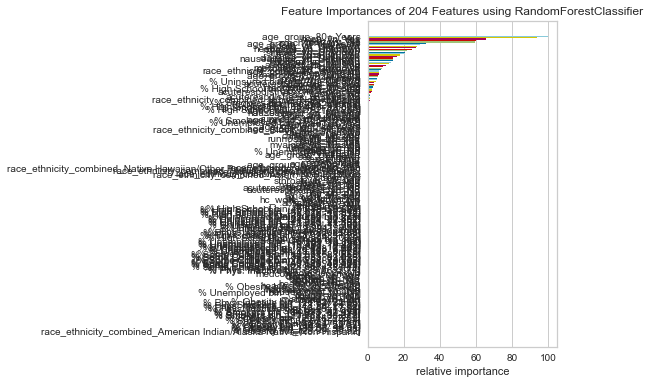

In [23]:
from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(shot_in_the_dark)
viz.fit(X_train, y_train)
viz.show()
#shot_in_the_dark.feature_importances_

In [24]:
important_stuff = zip(viz.features_,viz.feature_importances_)


In [25]:
important_stuff = list(important_stuff)

In [26]:
important_stuff

[('race_ethnicity_combined_American Indian/Alaska Native, Non-Hispanic', 0.0),
 ('% Obesity bin_(25.99, 30.52]', 0.0),
 ('% Obesity bin_(35.05, 39.58]', 0.0),
 ('% Obesity bin_(39.58, 44.11]', 0.0),
 ('% Obesity bin_(44.11, 48.64]', 0.0),
 ('% Obesity bin_(48.64, 53.17]', 0.0),
 ('% Obesity bin_(53.17, 57.7]', 0.0),
 ('% Obesity bin_nan', 0.0),
 ('% Smokers bin_(5.873, 9.467]', 0.0),
 ('% Obesity bin_(21.46, 25.99]', 0.0),
 ('% Smokers bin_(20.142, 23.7]', 0.0),
 ('% Smokers bin_(27.258, 30.817]', 0.0),
 ('% Smokers bin_(30.817, 34.375]', 0.0),
 ('% Smokers bin_(34.375, 37.933]', 0.0),
 ('% Smokers bin_(37.933, 41.491]', 0.0),
 ('% Smokers bin_nan', 0.0),
 ('% Phys. Inactive bin_(9.46, 13.54]', 0.0),
 ('% Phys. Inactive bin_(13.54, 17.58]', 0.0),
 ('% Phys. Inactive bin_(17.58, 21.62]', 0.0),
 ('% Smokers bin_(23.7, 27.258]', 0.0),
 ('% Phys. Inactive bin_(21.62, 25.66]', 0.0),
 ('% Obesity bin_(16.93, 21.46]', 0.0),
 ('medcond_yn_nan', 0.0),
 ('sthroat_yn_nan', 0.0),
 ('cough_yn_No', 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


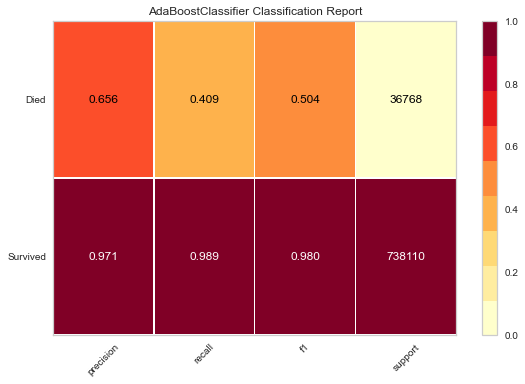

In [27]:
from sklearn.ensemble import AdaBoostClassifier
from yellowbrick.classifier import classification_report

classes = ["Survived","Died"]
aDamodel = AdaBoostClassifier(n_estimators=25).fit(X_train, y_train)
_ = classification_report(aDamodel, X_test, y_test, classes=classes, support=True, is_fitted=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


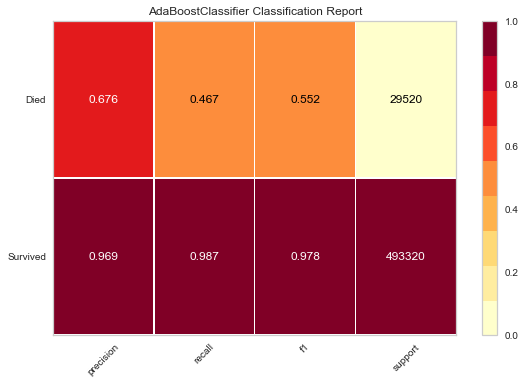

In [28]:
classes = ["Survived","Died"]
aDamodel_no_unknowns = AdaBoostClassifier(n_estimators=25).fit(X_train_no_unknowns, y_train_no_unknowns)
_ = classification_report(aDamodel_no_unknowns, X_test_no_unknowns, y_test_no_unknowns, classes=classes, support=True, is_fitted=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


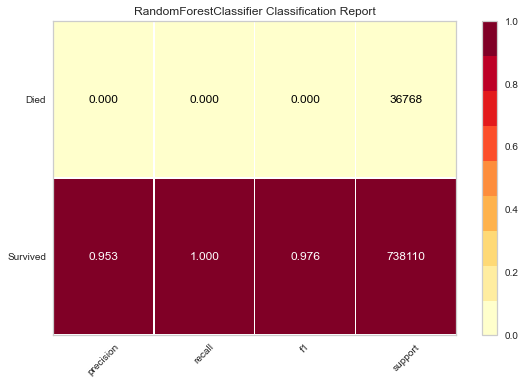

In [29]:

classes = ["Survived","Died"]
_ = classification_report(shot_in_the_dark, X_test, y_test, classes=classes, support=True, is_fitted=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


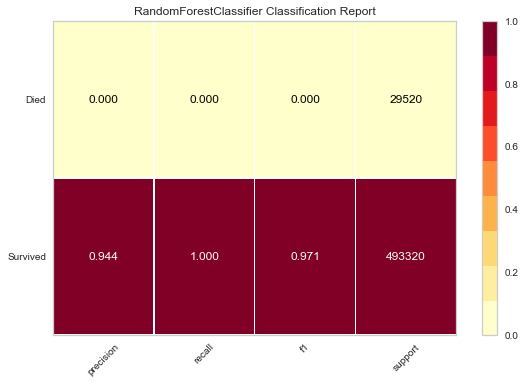

In [30]:
classes = ["Survived","Died"]
#no_unknown_aDamodel = AdaBoostClassifier(n_estimators=25).fit(X_train, y_train)
_ = classification_report(shot_in_the_dark_no_unknowns, X_test_no_unknowns, y_test_no_unknowns, classes=classes, support=True, is_fitted=True)